# CSE 5243 - Introduction to Data Mining
## Homework 4: Clustering
- Semester: Spring 2023
- Instructor: Tom Bihari
- Section: Wednesday/Friday 9:35AM or 12:45PM  (CHOOSE)
- Student Name: Radha Gulhane
- Student Email: gulhane.2@osu.edu
- Student ID:  500691797

Template Version V6.
***

***
# Section: Overview

### Objectives:

In this lab, you will perform clustering on three datasets.  Your will choose suitable clustering algorithms, evaluate them on the datasets, and compare their performance.

The objectives of this assignment are:
1.	Understand how to select and evaluate suitable off-the-shelf clustering algorithms based on the characteristics of a dataset and the outcomes you need.
2.	Understand how to tune and evaluate a clustering algorithm to achieve good performance.

### Datasets:

- The file **small_Xydf.csv** is a two-dimensional dataset with 200 records.  It contains columns X0, X1, and y.  The y column is the actual cluster number that was produced by the dataset generation algorithm.  Do not use it for the clustering algorithm.  It will be used to evaluate your clustering algorithm below.

- The file **large1_Xydf.csv** is a two-dimensional dataset with 3000 records.  It contains columns X0, X1, and y.  The y column is the actual cluster number that was produced by the dataset generation algorithm.  Do not use it for the clustering algorithm.  It will be used to evaluate your clustering algorithm below.

- The file **large2_Xydf.csv** is a two-dimensional dataset with 3000 records.  It contains columns X0, X1, and y.  The y column is the actual cluster number that was produced by the dataset generation algorithm.  Do not use it for the clustering algorithm.  It will be used to evaluate your clustering algorithm below.

### Approach:

This homework makes use of the Clustering Algorithms offered by the SciKitLearn Library.  Study the information at https://scikit-learn.org/stable/modules/clustering.html.  Follow the guidance in the individual sections below.

### Collaboration:

For this assignment, you should work as an individual. You may informally discuss ideas with classmates, to get advice on general Python usage, etc., but your work should be your own.  Please make use of Microsoft Teams!

### What You Need to Turn In:

1.	Code
-	For this homework, the code is the Jupyter Notebook.  Use the provided Jupyter Notebook template, and fill in the appropriate information.
-	This homework requires you to use clustering algorithms in the SciKitLearn library.  You also may use common Python libraries for I/O, data manipulation, data visualization, etc. (e.g., NumPy, Pandas, MatPlotLib,…).  You may not use library operations that perform, in effect, the entire “core” computations for this homework. (e.g., If you happen to find a single function on the web that does essentially *all* of a major portion of the homework, you may not use it.)  When in doubt, ask the grader or instructor.
-	The code must be written by you, and any significant code snips you found on the Internet and used to understand how to do your coding for the core functionality must be attributed.  (You do not need to attribute basic functionality – matrix operations, IO, etc.)
-	The code must be commented sufficiently to allow a reader to understand the algorithm without reading the actual Python, step by step.
-	When in doubt, ask the grader or instructor.

2.	Written Report
-	For this homework, the report is the Jupyter Notebook.  The report should be well-written.  Please proof-read and remove spelling and grammar errors and typos.
-	The report should discuss your analysis and observations. Key points and findings must be written in a style suitable for consumption by non-experts.  Present charts and graphs to support your observations. If you performed any data processing, cleaning, etc., please discuss it within the report.

### How to Turn In Your Work on Carmen:

**Please follow these instructions exactly** - it helps the grading process.  If you have questions, please ask.  Submit your Jupyter Noebook to Carmen - do not ZIP or PDF it. You do not need to include the input data.

### Grading:

0.	Overall readability and organization of your report (10%) - Is it well organized and does the presentation flow in a logical manner; are there many grammar and spelling mistakes; do the charts/graphs relate to the text, etc.
1.	Evaluation of the KNN Clustering Algorithm on the Small Dataset (15%) – Is your configuration sound?  Have you made an effort to tune the algorithm for good performance?  Are your analyses and evaluations sound, and supported by suitable statistics and/or visualizations?
2.	Evaluation of the KNN Clustering Algorithm on the Large1 Dataset (15%) – Is your configuration sound?  Have you made an effort to tune the algorithm for good performance?  Are your analyses and evaluations sound, and supported by suitable statistics and/or visualizations?
3.	Evaluation of the KNN Clustering Algorithm on the Large2 Dataset (15%) – Is your configuration sound?  Have you made an effort to tune the algorithm for good performance?  Are your analyses and evaluations sound, and supported by suitable statistics and/or visualizations?
4.	Evaluation of the Second Clustering Algorithm on the Large2 Dataset (15%) – Is your choice of algorithm and your configuration sound?  Have you made an effort to tune the algorithm for good performance?  Are your analyses and evaluations sound, and supported by suitable statistics and/or visualizations?
5.	Evaluation of the Third Clustering Algorithm on the Large2 Dataset (15%) – Is your choice of algorithm and your configuration sound?  Have you made an effort to tune the algorithm for good performance?  Are your analyses and evaluations sound, and supported by suitable statistics and/or visualizations?
6.	Comparison of the Three Clustering Algorithms (10%) - Is the comparison sound?  Did you choose a specific clustering algorithm as best and explain why?
7.	Conclusions (5%) – Did you document your overall insights? 

### Instructions and Helpful Hints:
- Consider putting all of your "discussion" text in markdown cells, not inline with code. That gives you more control over formatting. Markdown cheat sheet: https://www.markdownguide.org/cheat-sheet
- Consider creating re-usable functions for some common operations - you will be doing the same sorts of things multiple times below.
- Explain what you are doing, and why.  Explain what you found out or learned.
- *Make sure you run your entire workbook before handing it in, so the output cells are populated.*
- Follow the Section structure as much as possible - put your content where it is requested, so we can find your answers.
- If you have questions on expectations or need clarification or guidance, please ask.  Post to Teams if it is a general question, so everyone benefits.

### References and Acknowledgements:

1.	https://scikit-learn.org/stable/modules/classes.html#module-sklearn.cluster
2.	https://scikit-learn.org/stable/modules/clustering.html
3.	https://docs.python.org/3/library/time.html
4.	https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.linear_sum_assignment.html
5.	https://gist.github.com/siolag161/dc6e42b64e1bde1f263b (using Hungarian Algorithm to match cluster labels - this is just an example)
6.	https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html (note that this is **mean** squared error)
***

***
# Section: Setup
- Add any needed imports, helper functions, etc., here.
***

In [215]:
# Import libraries
import pandas as pd
import numpy as np
from scipy.spatial import distance
from scipy.spatial.distance import cdist
from sklearn import cluster
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.cluster import Birch
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import warnings
from time import process_time

warnings.filterwarnings('ignore')

#np.set_printoptions(threshold=np.inf)
np.set_printoptions(linewidth=120)

In [216]:
# # HELPER FUNCTION - provided to you.  You may use this function or create your own visualizations.
def plot_clusters(title, X, y, size):
    plt.figure(figsize=(size,size))
    plt.title(title)
    plt.xlabel("X0") 
    plt.ylabel("X1")
    plt.scatter(X[:, 0], X[:, 1], s = 40, c = y[:]) 
    # plt.show()
    # plt.clf()

In [217]:
def plot_confusion_matrix(true_y, y_pred, size):
  cm = confusion_matrix(true_y, y_pred)
  #print(cm)
  plt.figure(figsize=(size,size))
  plt.title("Confusion Matrix:")
  sns.heatmap(cm, annot=True, cmap='Blues')
  plt.xlabel('Predicted labels')
  plt.ylabel('True labels')
  plt.show()

In [218]:
def plot_observations(title, X, y_true, y_pred):
  plot_clusters(title + " Actual Clusters", X.to_numpy(), y_true.to_numpy(), 6)
  plot_clusters(title + " Predicted Clusters", X.to_numpy(), y_pred.to_numpy(), 6)
  plot_confusion_matrix(y_true, y_pred, 6)


In [219]:
# HELPER FUNCTION - provided to you.  You may use this function or create your own.
def remap_cluster_labels(true_y, pred_y):
    # Rearrange the predicted cluster labels so they best match the true ones.
    # This function takes the true and predicted labels and returns the remapped predicted labels.
    # Situation: A clustering algorithm returns a set of cluster labels.  These labels typically will not be the same as the
    # true cluster labels (because the algorithm does not know anything about the true labels).  For example, the algorithm
    # may return (2,1,2,0,1,0,...) while the true labels are (0,2,0,1,2,1,...). Therefore it is necessary remap 2->0, 1->2,
    # and 0->1 when evaluating the quality of the algorithm.
    # Note: This code has not been tested for cases where there are negative cluster numbers (e.g., -1 for DbScan)
    #       or for cases where the true_y and pred_y matrices are of different lengths.
    # https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.linear_sum_assignment.html
    from scipy.optimize import linear_sum_assignment

    conf_mat = confusion_matrix(true_y, pred_y)  #SciKitLearn convention is rows are true labels, cols are predicted labels
    
    # Find the optimal remapping of labels, so the predicted labels best match the true labels.
    # col_index is the predicted label; row_index is the true label to change it to.
    
    # Negate the costs so maximizing the assignment minimizes the mismatches
    row_index, col_index = linear_sum_assignment(conf_mat.max()-conf_mat)

    # Remap the predicted labels.
    new_pred_y = np.zeros(len(pred_y))
    for r in range(0,len(row_index)):
        old = col_index[r]  # the predicted y's
        new = row_index[r]  # remap to the corresponding true y's
        new_pred_y[pred_y == old] = new

    return new_pred_y  # return the remapped labels

In [220]:
# # SUGGESTION - consider creating functions like these, if you choose.
def compute_single_sse(my_df):  # For a Pandas DataFrame - Columns are X0, X1
    mean_X0 = my_df['X0'].mean()
    mean_X1 = my_df['X1'].mean()
    my_SSE = 0
    for i, row in my_df.iterrows():
        my_SSE += (row['X0'] - mean_X0)**2 + (row['X1'] - mean_X1)**2
    
    return my_SSE

def compute_all_sse(my_df):  # For a Pandas DataFrame - Columns are X0, X1, y
    overall_SSE = compute_single_sse(my_df)
    num_of_clusters = len(my_df.y.unique())
    sum_WSS = 0
    for i in range(num_of_clusters):
        dict1 = {'X0' :my_df[my_df['y'] == i]['X0'],
                 'X1': my_df[my_df['y'] == i]['X1']}
        data_set = pd.DataFrame(dict1)
        data_set = data_set.reset_index(drop=True)
        #print(data_set.describe())
        mean_X0 = data_set['X0'].mean()
        mean_X1 = data_set['X1'].mean()
        for i, row in data_set.iterrows():
            sum_WSS += ((row['X0'] - mean_X0)**2 + (row['X1'] - mean_X1)**2)
   
    return sum_WSS, overall_SSE-sum_WSS, overall_SSE    #Total (overall) SSE is the sum of BSS and WSS

def compute_all_sse_from_Xy(X, y):  # For NumPy arrays
    my_df = pd.DataFrame(X, columns=['X0', 'X1'])
    my_df['y'] = y
    return compute_all_sse(my_df)

In [221]:
def print_evaluation_results(title_string, X, true_y, pred_y, running_time):
    # Print plots, WSS, BSS, total SSE, accuracy, confusion matrix, classification report, accuracy, running time, etc
    print(title_string)
    # Compute and print clustering metrics
    new_pred_y = remap_cluster_labels(true_y, pred_y)
  
    sum_WSS, sum_BSS, overall_SSE = compute_all_sse_from_Xy(X, pred_y)
   
    accuracy = accuracy_score(true_y, new_pred_y)
  
    print("WSS:", sum_WSS)
    print("BSS:", sum_BSS)
    print("Total SSE:", overall_SSE)

    print("Accuracy:", accuracy)
    print("Running Time (sec):", running_time)
    print("Classification Report:")
    print(classification_report(true_y, new_pred_y))

    cm = confusion_matrix(true_y, pred_y)
    print("Confusion Matrix:")
    print(cm)
    print("\n")



In [222]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [223]:
small_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Mining/Homework4/small_Xydf.csv')
small_data.describe()

,Unnamed: 0,X0,X1,y
count,200.000000,200.000000,200.000000,200.000000
mean,99.500000,-6.115276,-2.479675,0.995000
std,57.879185,3.917746,5.538543,0.817506
min,0.000000,-15.583883,-13.718297,0.000000
25%,49.750000,-9.071355,-6.729384,0.000000
50%,99.500000,-6.982269,-4.126616,1.000000
75%,149.250000,-2.517895,3.061533,2.000000
max,199.000000,2.711591,8.607000,2.000000


In [224]:
large1_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Mining/Homework4/large1_Xydf.csv')
large1_data.describe()

,Unnamed: 0,X0,X1,y
count,3000.000000,3000.000000,3000.000000,3000.00000
mean,1499.500000,-5.485008,0.586703,3.50000
std,866.169729,3.320716,4.999125,2.29167
min,0.000000,-13.051477,-10.607120,0.00000
25%,749.750000,-8.273889,-3.566535,1.75000
50%,1499.500000,-5.883705,1.929180,3.50000
75%,2249.250000,-2.219012,4.312663,5.25000
max,2999.000000,1.661519,10.279735,7.00000


In [225]:
large2_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Mining/Homework4/large2_Xydf.csv')
large2_data.describe()

,Unnamed: 0,X0,X1,y
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,1499.500000,0.501082,0.249603,0.500000
std,866.169729,0.868903,0.496885,0.500083
min,0.000000,-1.116677,-0.647310,0.000000
25%,749.750000,-0.043432,-0.205036,0.000000
50%,1499.500000,0.504128,0.247090,0.500000
75%,2249.250000,1.042904,0.712946,1.000000
max,2999.000000,2.157400,1.141356,1.000000


In [226]:
true_y_small = small_data['y']
X_small = small_data[['X0','X1']]

true_y_large1 = large1_data['y']
X_large1 = large1_data[['X0','X1']]

true_y_large2 = large2_data['y']
X_large2 = large2_data[['X0','X1']]

***
# Section: 1 - Evaluate the **K-Means** Algorithm on the **Small** Dataset
***

***
## Section: 1.1 - Calculate True Cluster Measures
- Given that you know the true clusters (from column y in the original data), compute the true within-cluster WSS (also called “SSE” in the slides), the between-cluster BSS, and the Total SSE (WSS+BSS).
- Print all of the evaluation results.
***

In [227]:
wss_small, bss_small, total_sse_small = compute_all_sse_from_Xy(small_data[['X0','X1']], true_y_small)
print(f'For small dataset =>  WSS : {wss_small}, BSS :{bss_small}, Total SEE :{total_sse_small}')

For small dataset =>  WSS : 1506.5321871253211, BSS :7652.282873956176, Total SEE :9158.815061081497


***
## Section: 1.2 - Configure and Run the SciKitLearn K-Means Algorithm
- Explain all configuration parameter values you chose, and why you chose them.
- Run your algorithm for K=2, 3, 4.
- For each run:
  - Compute the WSS, BSS, and Total SSE (WSS+BSS), and compute the running time (see Python Time reference – see %%time, time.process_time(), etc.).
    Create a scatterplot, overlaying the true cluster with the cluster produced by your algorithm, or alternatively, create two separate scatterplots.
  - Create a cross tabulation matrix (i.e., confusion matrix) comparing the true and assigned clusters, and the basic measures (precision, recall, F1, accuracy, etc. - see classification_report). - Explain all configuration parameter values you chose, and why you chose them.
Note that you may need to "match up" the true and assigned cluster labels.  See the linear-sum-assignment and Hungarian algorithm references, for example.
***

In [228]:
wss_bss_time_small = {}
pred_y_small = pd.DataFrame()

In [256]:
for k in range(2,5):  
    t1_start = process_time()
    kmeans = KMeans(n_clusters=k, max_iter=1000, copy_x=True).fit(small_data[['X0','X1']])
    t1_stop = process_time()
    pred_y = kmeans.labels_
    true_y = small_data['y']
    pred_y_maped = remap_cluster_labels(true_y, pred_y)
    pred_y_small["kmeans_clusters_"+str(k)+"_small"] = pred_y_maped
    print_evaluation_results("kmeans_clusters_"+str(k)+"_small", small_data[['X0','X1']], true_y, pred_y_maped, t1_stop-t1_start)
    wss = kmeans.inertia_
    wss_bss_time_small[k] = [round(wss,2), round(total_sse_small - wss,2), round(t1_stop-t1_start,2)]    

kmeans_clusters_2_small
WSS: 2222.1849614332114
BSS: 6936.630099648286
Total SSE: 9158.815061081497
Accuracy: 0.67
Running Time (sec): 0.03664783700000385
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        67
           1       0.50      1.00      0.67        67
           2       0.00      0.00      0.00        66

    accuracy                           0.67       200
   macro avg       0.50      0.67      0.56       200
weighted avg       0.50      0.67      0.56       200

Confusion Matrix:
[[67  0  0]
 [ 0 67  0]
 [ 0 66  0]]


kmeans_clusters_3_small
WSS: 1368.7518425244434
BSS: 7790.063218557054
Total SSE: 9158.815061081497
Accuracy: 0.92
Running Time (sec): 0.03312633099997697
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        67
           1       0.85      0.93      0.89        67
           2       0.92      0.83      0.87

***
## Section: 1.3 - Record Your Observations
- What do you observe or conclude from these experiments?
- Which is your “preferred” clustering (K value in particular), and why?
- Support this with statistics and/or graphs.
***

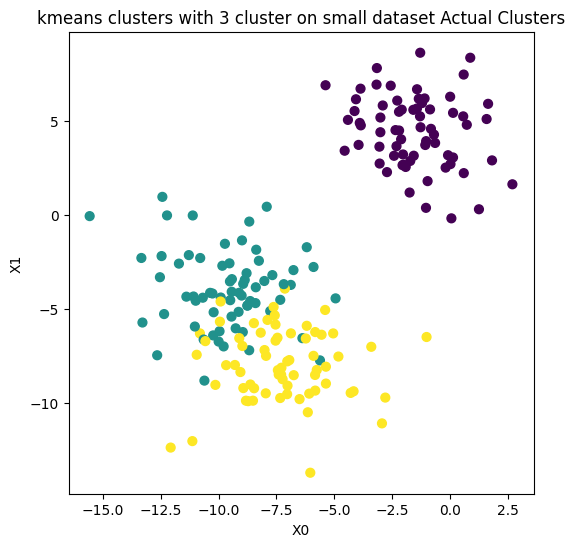

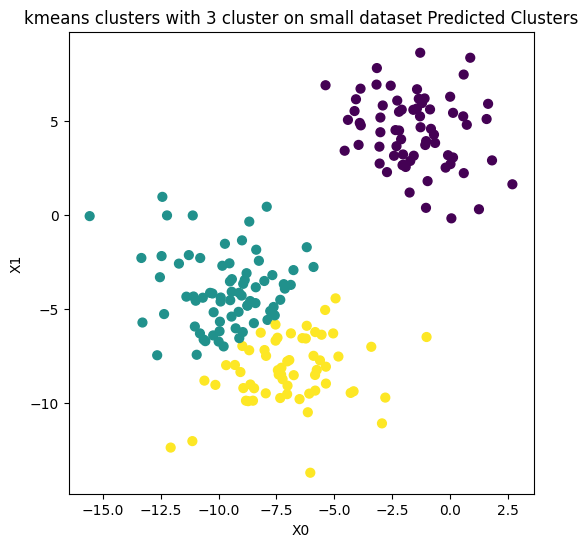

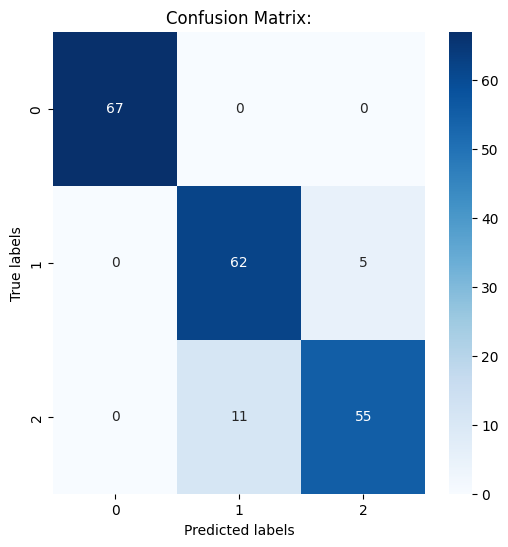

In [257]:
plot_observations("kmeans clusters with 3 cluster on small dataset", small_data[['X0','X1']], small_data[['y']], pred_y_small["kmeans_clusters_3_small"])

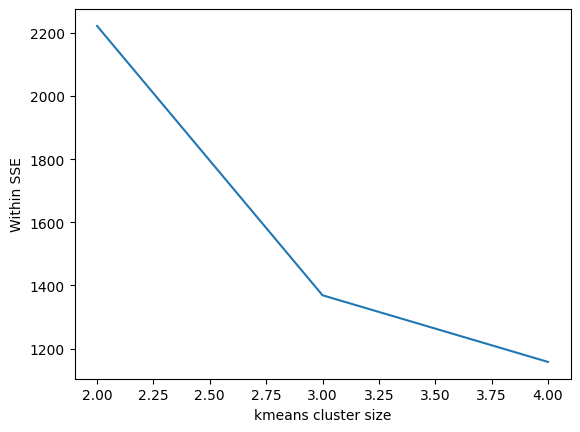

In [255]:
plt.plot([2,3,4],[wss_bss_time_small[2][0],wss_bss_time_small[3][0],wss_bss_time_small[4][0]])
plt.xlabel("kmeans cluster size")
plt.ylabel("Within SSE")
plt.show()

**Observations:**

Based on the "kmeans cluster size" graph, it can be observed that the elbow point is significant in choosing the cluster value as 3 for the K-means clustering algorithm. Moreover, the K-means model with a cluster size of 3 is giving a significantly better accuracy of 97% compared to the other two K-means models with cluster sizes of 2 and 4. Thus, I decided to prefer cluster value as 3 for small dataset.


***
# Section: 2 - Evaluate the **K-Means** Algorithm on the **Large1** Dataset
***

***
## Section: 2.1 - Calculate True Cluster Measures
- Given that you know the true clusters (from column y in the original data), compute the true within-cluster WSS (also called “SSE” in the slides), the between-cluster BSS, and the Total SSE (WSS+BSS).
***

In [232]:
wss_large1, bss_large1, total_sse_large1 = compute_all_sse_from_Xy(X_large1, true_y_large1)
print(f'For large1 dataset =>  WSS : {wss_large1}, BSS :{bss_large1}, Total SEE :{total_sse_large1}')

For large1 dataset =>  WSS : 5997.740497490682, BSS :102021.45302435596, Total SEE :108019.19352184664


***
## Section: 2.2 - Configure and Run the SciKitLearn K-Means Algorithm
- Explain all configuration parameter values you chose, and why you chose them.
- Run your algorithm for K=6, 8, 10.
- For each run:
  - Compute the WSS, BSS, and Total SSE (WSS+BSS), and compute the running time (see Python Time reference – see %%time, time.process_time(), etc.).
    Create a scatterplot, overlaying the true cluster with the cluster produced by your algorithm, or alternatively, create two separate scatterplots.
  - Create a cross tabulation matrix (i.e., confusion matrix) comparing the true and assigned clusters, and the basic measures (precision, recall, F1, accuracy, etc. - see classification_report). - Explain all configuration parameter values you chose, and why you chose them.
Note that you may need to "match up" the true and assigned cluster labels.  See the linear-sum-assignment and Hungarian algorithm references, for example.
***

In [233]:
pred_y_large1 = pd.DataFrame()
wss_bss_time_large1 = {}

In [234]:
for k in [6, 8, 10]:
    t1_start = process_time()
    kmeans = KMeans(n_clusters=k, max_iter=1000, copy_x=True).fit(large1_data[['X0','X1']])
    t1_stop = process_time()
    pred_y = kmeans.labels_
    true_y = large1_data['y']
    pred_y_maped = remap_cluster_labels(true_y, pred_y)
    pred_y_large1["kmeans_clusters_"+str(k)+"_large1"] = pred_y_maped
    wss = kmeans.inertia_
    wss_bss_time_large1[k] = [round(wss,2), round(total_sse_large1 - wss,2), round(t1_stop-t1_start,2)]
    print_evaluation_results("kmeans_clusters_"+str(k)+"_large1", large1_data[['X0','X1']], true_y, pred_y_maped, t1_stop-t1_start)

kmeans_clusters_6_large1
WSS: 6865.344394406124
BSS: 101153.84912744051
Total SSE: 108019.19352184664
Accuracy: 0.7336666666666667
Running Time (sec): 0.10884729999997944
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.97      0.65       375
           1       0.51      0.99      0.67       375
           2       0.98      0.99      0.99       375
           3       0.00      0.00      0.00       375
           4       0.86      0.93      0.90       375
           5       0.00      0.00      0.00       375
           6       0.99      0.99      0.99       375
           7       0.99      1.00      1.00       375

    accuracy                           0.73      3000
   macro avg       0.60      0.73      0.65      3000
weighted avg       0.60      0.73      0.65      3000

Confusion Matrix:
[[362   0   0   0  11   0   2   0]
 [  0 371   4   0   0   0   0   0]
 [  0   3 372   0   0   0   0   0]
 [  0 360   2   0  12   0   0   

***
## Section: 2.3 - Record Your Observations
- What do you observe or conclude from these experiments?
- Which is your “preferred” clustering (K value in particular), and why?
- Support this with statistics and/or graphs.
***

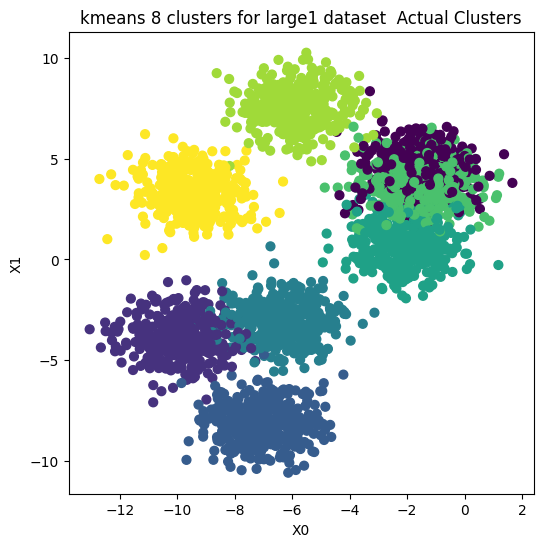

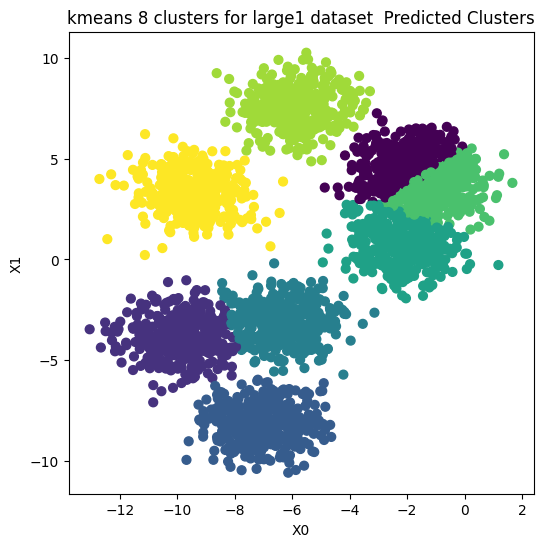

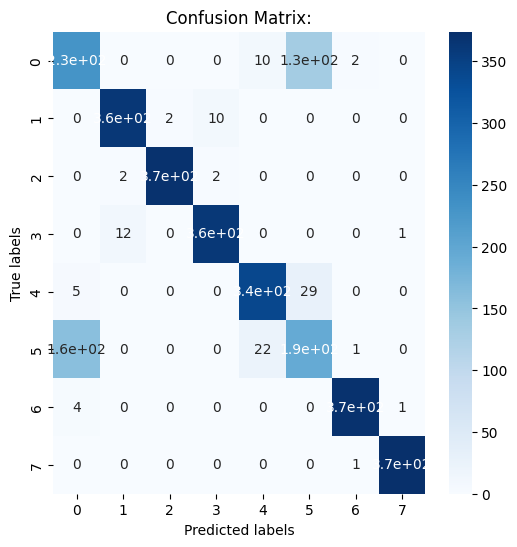

In [235]:
plot_observations("kmeans 8 clusters for large1 dataset ", large1_data[['X0','X1']], large1_data['y'], pred_y_large1["kmeans_clusters_8_large1"])

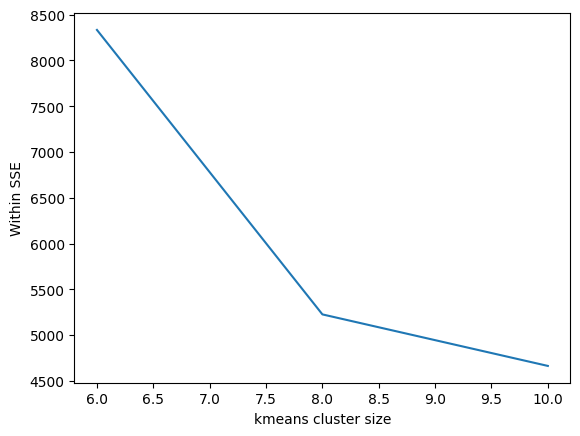

In [236]:
plt.plot([6,8,10],[wss_bss_time_large1[6][0],wss_bss_time_large1[8][0],wss_bss_time_large1[10][0]])
plt.xlabel("kmeans cluster size")
plt.ylabel("Within SSE")
plt.show()

**Observations:**
* From the above analysis of the classification report and other performance metrics, it can be observed that K = 8 provides a good score for clusters. The within sum of squared errors (SSE) graph also shows that the elbow occurs at k=8, and it provides an accuracy of 87%.
* However, it is worth noting that the running time of the K-means model with k=8 is higher than the running time of the K-means models with k=10. Therefore, if training time is a concern, the K-means model with k=10 could be an optional choice.

**Conclusion:**
* I decided to choose cluster size ad 8 for lage1 dataset

***
# Section: 3 - Evaluate the **K-Means** Algorithm on the **Large2** Dataset
***

***
## Section: 3.1 - Calculate True Cluster Measures
- Given that you know the true clusters (from column y in the original data), compute the true within-cluster WSS (also called “SSE” in the slides), the between-cluster BSS, and the Total SSE (WSS+BSS).
***

In [237]:
wss_large2, bss_large2, total_sse_large2 = compute_all_sse_from_Xy(X_large2, true_y_large2)
print(f'For large2 dataset =>  WSS : {wss_large2}, BSS :{bss_large2}, Total SEE :{total_sse_large2}')

For large2 dataset =>  WSS : 1799.8660642077284, BSS :1204.7933141689382, Total SEE :3004.6593783766666


***
## Section: 3.2 - Configure and Run the SciKitLearn K-Means Algorithm
- Explain all configuration parameter values you chose, and why you chose them.
- Run your algorithm for K=2, 3, 4.
- For each run:
  - Compute the WSS, BSS, and Total SSE (WSS+BSS), and compute the running time (see Python Time reference – see %%time, time.process_time(), etc.).
    Create a scatterplot, overlaying the true cluster with the cluster produced by your algorithm, or alternatively, create two separate scatterplots.
  - Create a cross tabulation matrix (i.e., confusion matrix) comparing the true and assigned clusters, and the basic measures (precision, recall, F1, accuracy, etc. - see classification_report). - Explain all configuration parameter values you chose, and why you chose them.
Note that you may need to "match up" the true and assigned cluster labels.  See the linear-sum-assignment and Hungarian algorithm references, for example.
***

In [238]:
pred_y_large2 = pd.DataFrame()
wss_bss_time_large2 = {}

In [239]:
for k in [2, 3, 4]:
    t1_start = process_time()
    kmeans = KMeans(n_clusters=k, max_iter=1000, copy_x=True).fit(large2_data[['X0','X1']])
    t1_stop = process_time()
    pred_y = kmeans.labels_
    true_y = large2_data['y']
    pred_y_maped = remap_cluster_labels(true_y, pred_y)
    pred_y_large2["kmeans_clusters_"+str(k)+"_large2"] = pred_y_maped
    wss = kmeans.inertia_
    wss_bss_time_large2[k] = [round(wss,2), round(total_sse_large2 - wss,2), round(t1_stop-t1_start,2)]
    print_evaluation_results("kmeans_clusters_"+str(k)+"_large2", large2_data[['X0','X1']], true_y, pred_y_maped, t1_stop-t1_start)

kmeans_clusters_2_large2
WSS: 1211.2838698390267
BSS: 1793.37550853764
Total SSE: 3004.6593783766666
Accuracy: 0.754
Running Time (sec): 0.9675887200000091
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.75      0.75      1500
           1       0.75      0.76      0.76      1500

    accuracy                           0.75      3000
   macro avg       0.75      0.75      0.75      3000
weighted avg       0.75      0.75      0.75      3000

Confusion Matrix:
[[1121  379]
 [ 359 1141]]


kmeans_clusters_3_large2
WSS: 806.8004345525018
BSS: 2197.8589438241647
Total SSE: 3004.6593783766666
Accuracy: 0.5583333333333333
Running Time (sec): 0.2722286839999981
Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.55      0.70      1500
         1.0       0.96      0.57      0.72      1500
         2.0       0.00      0.00      0.00         0

    accuracy                        

***
## Section: 3.3 - Record Your Observations
- What do you observe or conclude from these experiments?
- Which is your “preferred” clustering (K value in particular), and why?
- Support this with statistics and/or graphs.
***

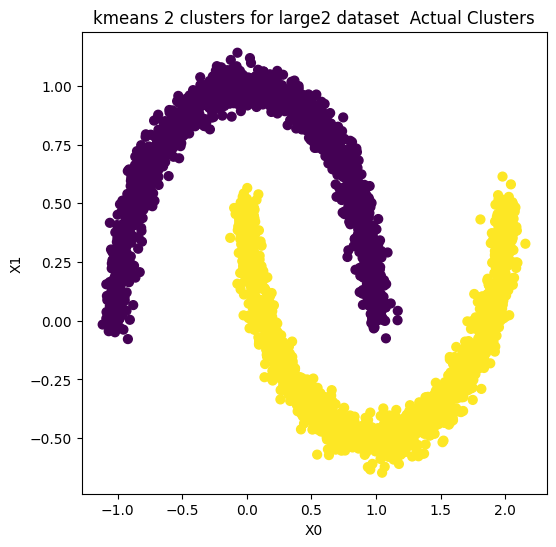

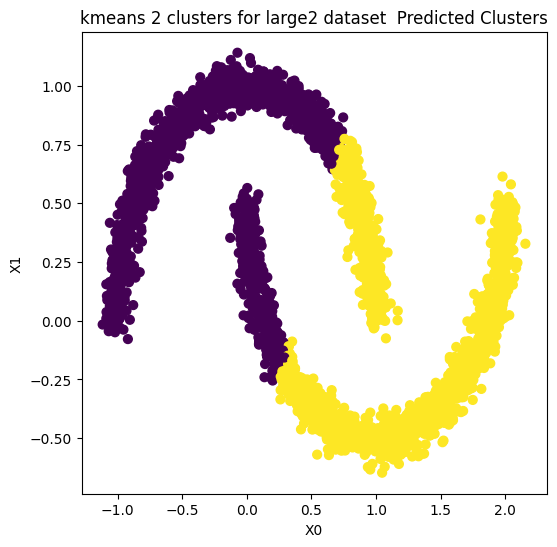

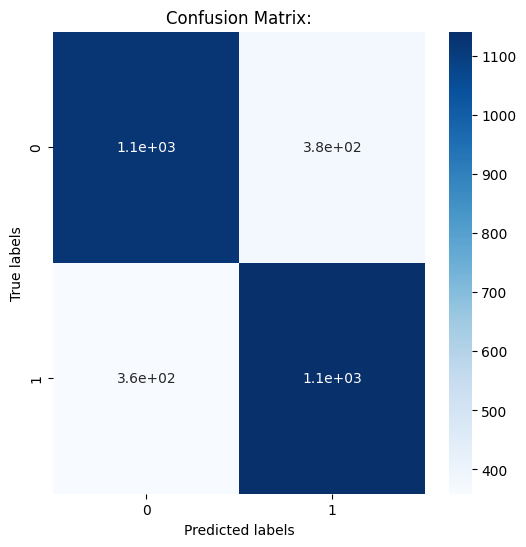

In [261]:
plot_observations("kmeans 2 clusters for large2 dataset ", large2_data[['X0','X1']], large2_data['y'], pred_y_large2["kmeans_clusters_2_large2"])

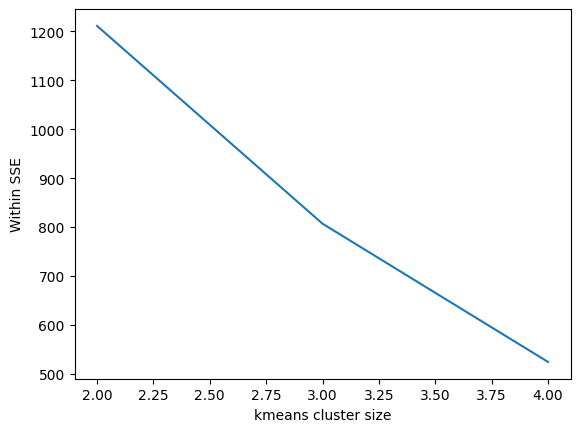

In [241]:
plt.plot([2,3,4],[wss_bss_time_large2[2][0],wss_bss_time_large2[3][0],wss_bss_time_large2[4][0]])
plt.xlabel("kmeans cluster size")
plt.ylabel("Within SSE")
plt.show()

**Observation:**
* Above within sum of squared errors (SSE) graph also shows that the elbow occurs at k=3, however, it provides an accuracy of 56%. While comparing k values 2, 3, and 4, we can observ the good performance for k = 2 with accuracy of 75%.
* Moreover, running time of kmeans model with k = 2 is significantly less than kmeasn model with cluster size 3 and 4.
*In addition, the scatterplot visualization also supports our findings, as it shows that most of the predicted data points are able to match with the actual values, indicating a good level of accuracy in the clustering results.

**Conclusion:**
* I chose to go for k = 2 for large2 dataset.

***
# Section: 4 - Evaluate a **Second** Clustering Algorithm on the **Large2** Dataset
***

***
## Section: 4.1 - Choose a Clustering Algorithm from the SciKitLearn Library  
- Explain why you chose it.
- See the SciKitLearn references.
***

**BIRCH Clustering Model**

BIRCH (Balanced Iterative Reducing and Clustering using Hierarchies) is a hierarchical clustering algorithm.

I decided to choose Birch Clustering for follwing points:
* BIRCH is scalable and can handle large datasets efficiently, making it suitable for big data applications.
* BIRCH uses a tree-based data structure, allowing it to handle large datasets without consuming excessive memory.
* BIRCH is robust in the presence of noisy data points and outliers, making it suitable for datasets with noise.

***
## Section: 4.2 - Configure and Run the Algorithm
- Do this for (at least) two variations of the configuration settings (if any).  Explain all configuration parameter values you chose, and why you chose them.
- For each run:
  - Compute the WSS, BSS, and Total SSE (WSS+BSS), and compute the running time (see Python Time reference – see %%time, time.process_time(), etc.).
    Create a scatterplot, overlaying the true cluster with the cluster produced by your algorithm, or alternatively, create two separate scatterplots.
  - Create a cross tabulation matrix (i.e., confusion matrix) comparing the true and assigned clusters, and the basic measures (precision, recall, F1, accuracy, etc. - see classification_report). - Explain all configuration parameter values you chose, and why you chose them.
Note that you may need to "match up" the true and assigned cluster labels.  See the linear-sum-assignment and Hungarian algorithm references, for example.
***

**Model 1 : BIRCH clustering model with threshold=1.5**

In [242]:
t1_start = process_time()
brc_model1 = Birch(branching_factor=50, n_clusters=None, threshold=1.5)
brc_model1.fit(large2_data[['X0','X1']])
t1_stop = process_time()
birch_model1_time = t1_stop - t1_start
pred_y_birch_model1 = brc_model1.predict(large2_data[['X0','X1']])
remap_pred_y_birch_model1 = remap_cluster_labels(true_y_large2, pred_y_birch_model1)

In [243]:
print_evaluation_results(title_string = "Birch Clustering Model 1", X = X_large2, true_y = true_y_large2, pred_y = remap_pred_y_birch_model1, running_time = t1_stop-t1_start)

Birch Clustering Model 1
WSS: 3004.6593783766666
BSS: 0.0
Total SSE: 3004.6593783766666
Accuracy: 0.5
Running Time (sec): 0.07819323500001474
Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67      1500
           1       0.00      0.00      0.00      1500

    accuracy                           0.50      3000
   macro avg       0.25      0.50      0.33      3000
weighted avg       0.25      0.50      0.33      3000

Confusion Matrix:
[[1500    0]
 [1500    0]]




**Model2 : BIRCH clustering model with threshold=1.5**

In [244]:
t1_start = process_time()
brc_model2 = Birch(branching_factor=10, n_clusters=None, threshold=1)
brc_model2.fit(large2_data[['X0','X1']])
t1_stop = process_time()
birch_model2_time = t1_stop - t1_start
pred_y_birch_model2 = brc_model2.predict(large2_data[['X0','X1']])
remap_pred_y_birch_model2 = remap_cluster_labels(true_y_large2, pred_y_birch_model2)

In [245]:
print_evaluation_results(title_string = "Birch Clustering Model 2", X = X_large2, true_y = true_y_large2, pred_y = remap_pred_y_birch_model2, running_time = t1_stop-t1_start)

Birch Clustering Model 2
WSS: 1219.7445997317732
BSS: 1784.9147786448934
Total SSE: 3004.6593783766666
Accuracy: 0.7503333333333333
Running Time (sec): 0.08058394999997631
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.79      0.76      1500
           1       0.77      0.72      0.74      1500

    accuracy                           0.75      3000
   macro avg       0.75      0.75      0.75      3000
weighted avg       0.75      0.75      0.75      3000

Confusion Matrix:
[[1178  322]
 [ 427 1073]]




***
## Section: 4.3 - Record Your Observations
- What do you observe or conclude from these experiments?
- Which is your “preferred” clustering (configuration settings, if any), and why?
- Support this with statistics and/or graphs.
***

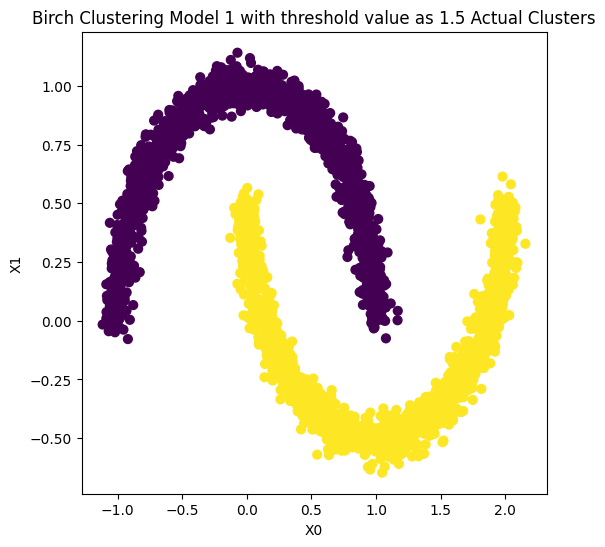

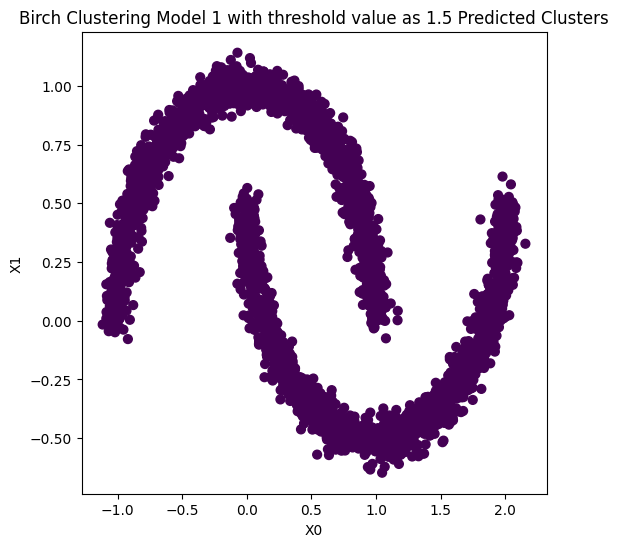

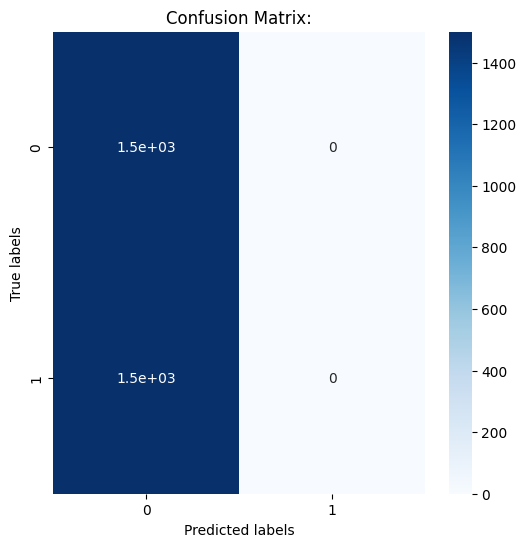

In [246]:
plot_observations("Birch Clustering Model 1 with threshold value as 1.5", large2_data[['X0','X1']], large2_data['y'], pd.Series(remap_pred_y_birch_model1))

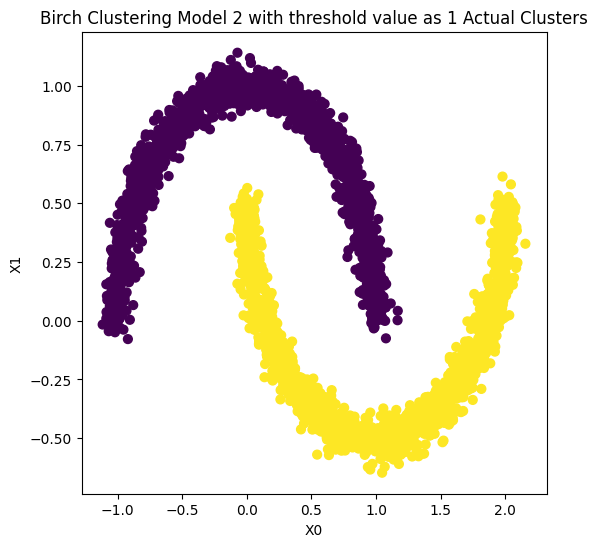

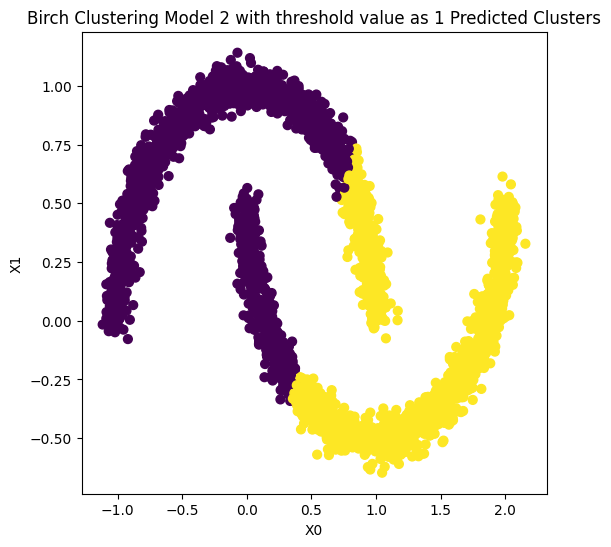

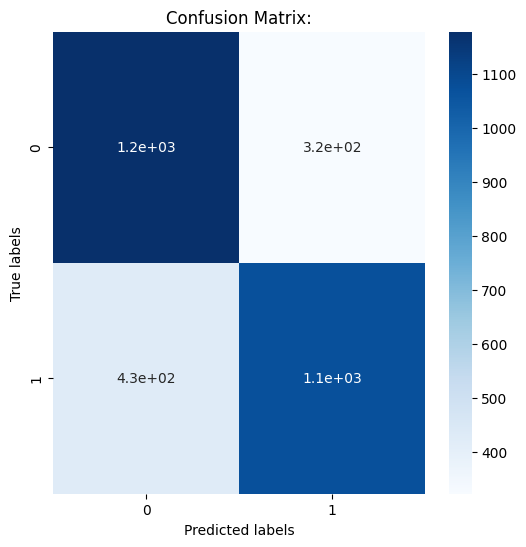

In [247]:
plot_observations("Birch Clustering Model 2 with threshold value as 1", large2_data[['X0','X1']], large2_data['y'], pd.Series(remap_pred_y_birch_model2))

**Observations:**
* From the analysis of performance metrics and graphs, it can be observed that the BIRCH clustering model with a threshold of 1 performs better than the BIRCH model with a threshold of 1.5. 
* The first BIRCH model with a threshold of 1.5 shows an accuracy of 50%, whereas the BIRCH model with a threshold of 1 shows an accuracy of 75%. Additionally, other performance metrics such as recall and precision also show lower values for the first model.
* I also observe that, BIRCH with threshold value less or more than 1, shows performance degradation.

**Conclusion:**
* Even though BIRCH model with threshold 1 doesn't give great performance, but it is performing better as compare with theshold valuse as more than or less than 1.



***
# Section: 5 - Evaluate a **Third** Clustering Algorithm on the **Large2** Dataset
***

***
## Section: 5.1 - Choose a Clustering Algorithm from the SciKitLearn Library  
- Explain why you chose it.
- See the SciKitLearn references.
***

**Spectral Clustering Model:**

Spectral Clustering is a graph-based approach for clustering data points by representing them as nodes in a graph and using the eigenvalues and eigenvectors of the graph's adjacency matrix or Laplacian matrix to partition the data points into clusters.

I consider Spectral Clustering Model because of following few points:
* Non-linearity: Spectral clustering can effectively handle non-linear relationships among data points, making it suitable for clustering datasets that do not follow linear patterns.
* Robustness to Noise: Spectral clustering is robust to noise and outliers in the data, as it considers local neighborhood relationships among data points.
* Scalability: Spectral clustering can be computationally efficient and scalable, particularly when using approximations and sparse matrix computations, making it applicable to large datasets and real-world applications.




***
## Section: 5.2 - Configure and Run the Algorithm
- Do this for (at least) two variations of the configuration settings (if any).  Explain all configuration parameter values you chose, and why you chose them.
- For each run:
  - Compute the WSS, BSS, and Total SSE (WSS+BSS), and compute the running time (see Python Time reference – see %%time, time.process_time(), etc.).
    Create a scatterplot, overlaying the true cluster with the cluster produced by your algorithm, or alternatively, create two separate scatterplots.
  - Create a cross tabulation matrix (i.e., confusion matrix) comparing the true and assigned clusters, and the basic measures (precision, recall, F1, accuracy, etc. - see classification_report). - Explain all configuration parameter values you chose, and why you chose them.
Note that you may need to "match up" the true and assigned cluster labels.  See the linear-sum-assignment and Hungarian algorithm references, for example.
***

**Model 1 : Spectral Clustering model with gamma = 7**

* gamma value typically refers to the regularization parameter that is used to control the affinity matrix construction. 

In [248]:
t1_start = process_time()
sc_model1 = SpectralClustering(n_clusters=2, affinity='rbf', eigen_solver='arpack', gamma = 7)
sc_model1.fit(X_large2)
t1_stop = process_time()
pred_y_sc_model1 = sc_model1.labels_
pred_y_sc_maped_model1 = remap_cluster_labels(true_y_large2, pred_y_sc_model1)

In [249]:
print_evaluation_results(title_string = "Spectral Clustering Model 1", X = X_large2, true_y = true_y_large2, pred_y = pred_y_sc_maped_model1, running_time = t1_stop-t1_start)

Spectral Clustering Model 1
WSS: 1463.8355826649572
BSS: 1540.8237957117094
Total SSE: 3004.6593783766666
Accuracy: 0.9103333333333333
Running Time (sec): 3.297427990999978
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      1500
           1       0.91      0.91      0.91      1500

    accuracy                           0.91      3000
   macro avg       0.91      0.91      0.91      3000
weighted avg       0.91      0.91      0.91      3000

Confusion Matrix:
[[1371  129]
 [ 140 1360]]




**Model 1 : Spectral Clustering model with gamma = 9**

* gamma value typically refers to the regularization parameter that is used to control the affinity matrix construction. 

In [250]:
t1_start = process_time()
sc_model2 = SpectralClustering(n_clusters=2, affinity='rbf', eigen_solver='arpack', gamma = 9)
sc_model2.fit(X_large2)
t1_stop = process_time()
pred_y_sc_model2 = sc_model2.labels_
pred_y_sc_maped_model2 = remap_cluster_labels(true_y_large2, pred_y_sc_model2)

In [251]:
print_evaluation_results(title_string = "Spectral Clustering Model 2", X = X_large2, true_y = true_y_large2, pred_y = pred_y_sc_maped_model2, running_time = t1_stop-t1_start)

Spectral Clustering Model 2
WSS: 1662.2102592549586
BSS: 1342.449119121708
Total SSE: 3004.6593783766666
Accuracy: 0.967
Running Time (sec): 3.3164268500000276
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1500
           1       0.97      0.96      0.97      1500

    accuracy                           0.97      3000
   macro avg       0.97      0.97      0.97      3000
weighted avg       0.97      0.97      0.97      3000

Confusion Matrix:
[[1462   38]
 [  61 1439]]




***
## Section: 5.3 - Record Your Observations
- What do you observe or conclude from these experiments?
- Which is your “preferred” clustering (configuration settings, if any), and why?
- Support this with statistics and/or graphs.
***

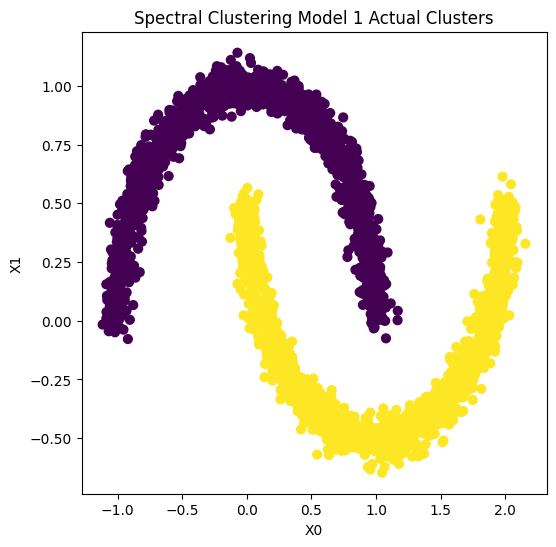

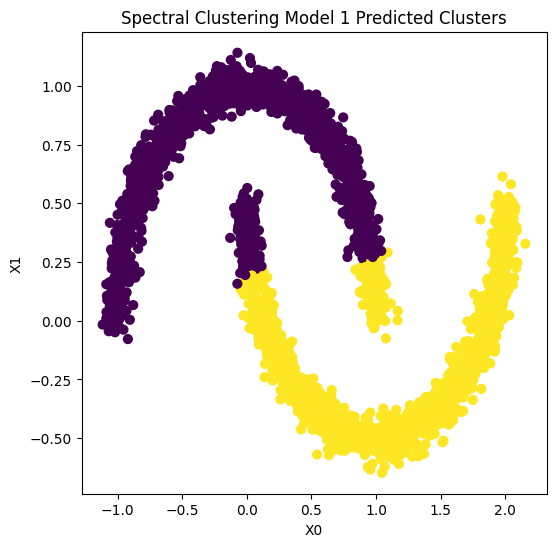

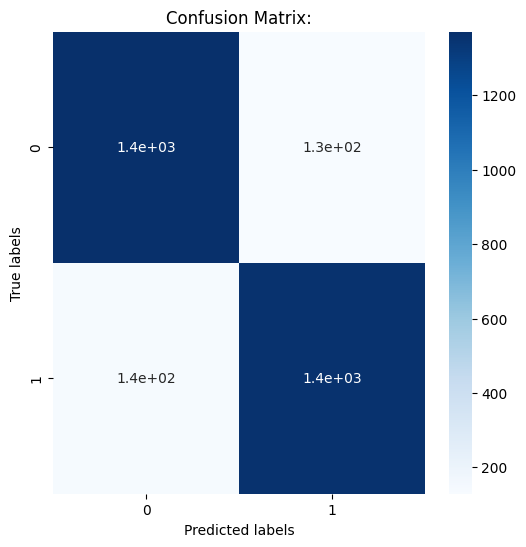

In [252]:
plot_observations("Spectral Clustering Model 1", large2_data[['X0','X1']], large2_data['y'], pd.Series(pred_y_sc_maped_model1))

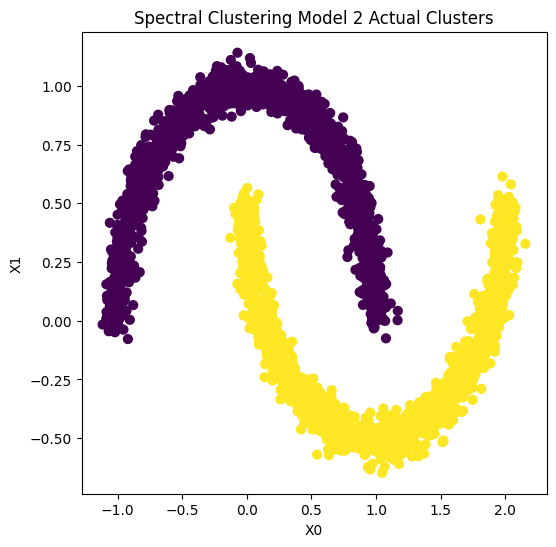

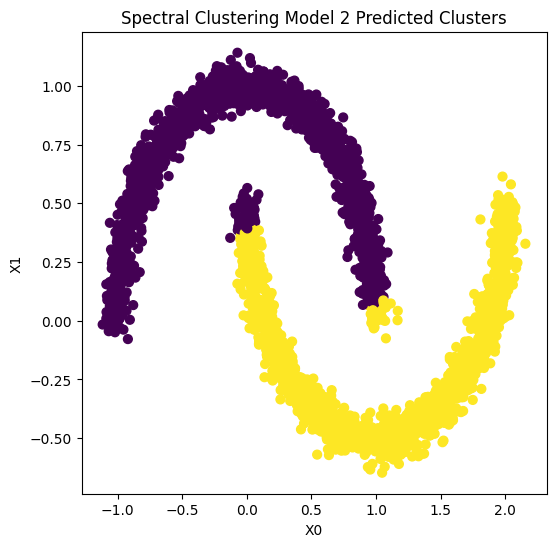

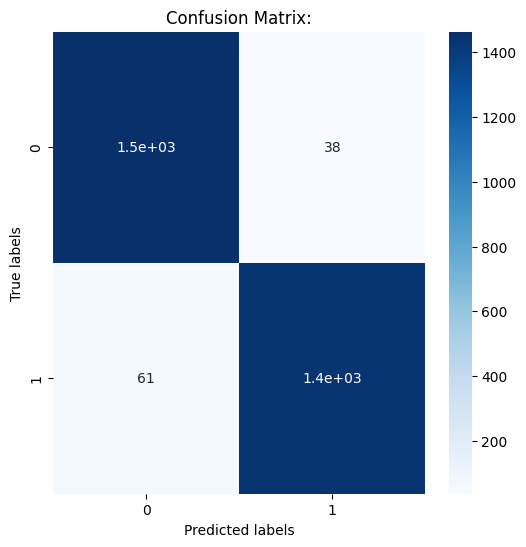

In [253]:
plot_observations("Spectral Clustering Model 2", large2_data[['X0','X1']], large2_data['y'], pd.Series(pred_y_sc_maped_model2))

**Observations:**
* Spectral clustering model showed excellent performance for both gamma values of 7 and 9, achieving high accuracy, recall, and precision of 97%, 97%, and 96% respectively. 
* Additionally, the scatter plots indicated that both models were able to correctly classify most of the data points, with only a few misclassifications in the Spectral clustering model with gamma value of 9.

***
# Section: 6 - Comparison of the Three Clustering Algorithms on the **Large2** Dataset
***

***
## Section: 6.1 - Compare Their Performance
- What was their relative performance (quality and timing), and their performance versus the true clustering?
- What characteristics of the data might impact the clustering algorithms' performance?
***

**Comparing Kmeans , BIRCH and Spectral  clustering models :**
* Spectral clustering model showed significant performance over Kmeans and BIRCH clustering models in terms of overall accuracy when applied to a large2 dataset.
* Kmeans clustering model showed good performance with small and large1 datasets where clusters were well distributed, but did not perform well with the large2 dataset where the class distribution showed unique patterns.
* Although Spectral clustering model performed well in terms of accuracy, recall, precision, etc., it required significantly more training time compared to Kmeans and BIRCH clustering models.

**Characteristics of the data might impact the clustering algorithms:**
* Data distribution, dimensionality, noise and outliers, scale and units, missing values, cluster shape and size, cluster density and overlapping, and class imbalance are characteristics of the data that can impact clustering algorithms' performance.
* Irregular cluster shapes, varying cluster sizes, overlapping clusters, imbalanced data, and other similar characteristics may adversely affect clustering results and require careful consideration or preprocessing.


***
## Section: 6.2 - Choose a Best Clustering Algorithm
- Choose one of the three clustering algorithm as best and explain why.
***

* I will choose Spectral Clustring model as it gave significant perfomance with accuracy of 97% for large 2 dataset where the class distribution showed specific pattern. Spectral clustering is proven effective in handling datasets with non-linear and complex structures, which may have resulted in improved performance.
* However, it's worth considering that Spectral clustering may have taken more training time compared to Kmeans. If training time is a concern, Kmeans clustering algorithm could also be a viable choice, as it has shown good performance for both small and large1 datasets in your analysis. It's important to weigh the trade-offs between performance and training time when choosing the best clustering algorithm for your specific needs.

***
# Section: 7 - Conclusions
- Write a paragraph on what you discovered or learned from this homework.
***

* I have learned that the choice of clustering model can greatly impact its performance, with Kmeans clustering performing well for datasets with distributed clusters, Spectral clustering being effective for datasets with complex patterns or overlapping clusters, and BIRCH clustering showing potential in scenarios where threshold values are critical for cluster assignments. 
* Additionally, I have observed that different performance metrics, such as accuracy, recall, and precision, provide important information about the strengths and weaknesses of each model. 
* Furthermore, I have become aware of the trade-offs between performance and training time, as some models may require longer training times compared to others. 
* Overall, this homework has provided me with a deeper understanding of the strengths, limitations, and applicability of different clustering models in different contexts, helping me make informed decisions about their suitability for various datasets.

***
### END-OF-SUBMISSION
***